# Homework # 2 - Exploratory Data Analysis & Data Preparation
Data files: white_wine_quality.csv & shoppers.csv

## Part 1: Exploratory Data Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load data

In [2]:
# Read data from file into dataframe
# Note: field separator is ;
wine_df = pd.read_csv('white_wine_quality.csv', sep = ";")

### Examine data

In [3]:
# Display dataframe shape
print(wine_df.shape)

(4898, 12)


In [4]:
# Display first few rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable

In [6]:
# Display the distinct classes (quality)
wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
# Display the counts for each class (quality)
wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

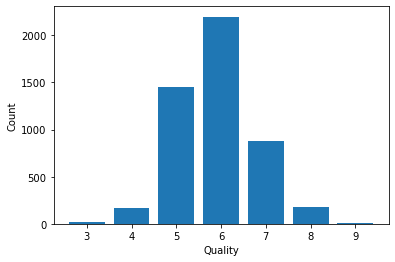

In [8]:
# Display (i.e. bar graph) the distribution of the classes (quality)
x = list(wine_df['quality'].unique())
y = list(wine_df['quality'].value_counts())
plt.xlabel('Quality')
plt.ylabel('Count')
plt.bar(x,y)
plt.show()

### Visualize the correlation matrix using a heatmap in seaborn

<AxesSubplot:>

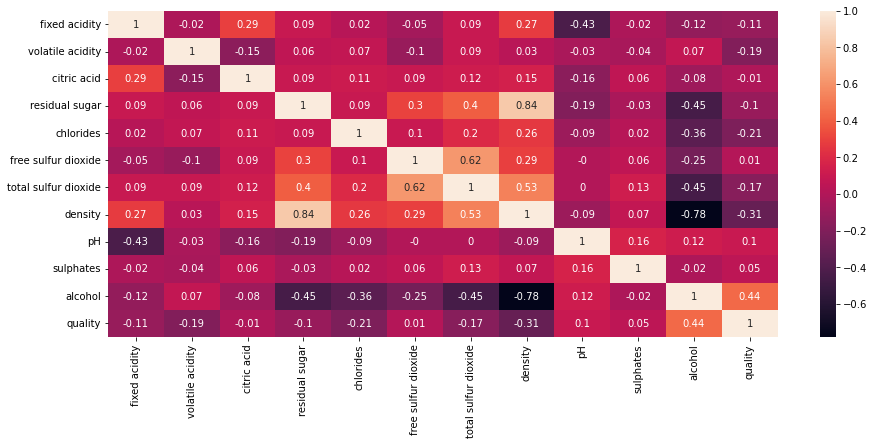

In [9]:
# Display the correlation matrix
plt.figure(figsize = (15,6))
correlation_matrix = wine_df.corr().round(2)
sns.heatmap(correlation_matrix, annot = True)

## Part 2: Data Preparation

### Import libraries

In [10]:
from sklearn.impute import SimpleImputer                         # for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder    # for encoding categorical data
from sklearn.model_selection import train_test_split             # for splitting training and testing data
from sklearn.preprocessing import StandardScaler                 # for feature scaling

### Load new dataset

In [11]:
# Read data from file into dataframe
df = pd.read_csv('shoppers.csv')

### Examine new dataset

In [12]:
df.shape

(10, 4)

In [13]:
# Review data
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Identify missing values

In [14]:
df.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

### Impute missing values

In [15]:
# Create temporary dataframe 1 with only Age and Income columns
temp = df[['Income', 'Age']].copy()
temp.head()

,Income,Age
0,86400.0,49.0
1,57600.0,32.0
2,64800.0,35.0
3,73200.0,43.0
4,NaN,45.0


In [16]:
# Replace missing values with mean of all the other values
temp['Income'].fillna(value = temp['Income'].mean(), inplace = True)
temp['Age'].fillna(value = temp['Age'].mean(), inplace = True)
temp.head()

,Income,Age
0,86400.000000,49.0
1,57600.000000,32.0
2,64800.000000,35.0
3,73200.000000,43.0
4,76533.333333,45.0


In [17]:
# Create temporary dataframe 2 with post-imputation data
temp

,Income,Age
0,86400.000000,49.000000
1,57600.000000,32.000000
2,64800.000000,35.000000
3,73200.000000,43.000000
4,76533.333333,45.000000
5,69600.000000,40.000000
6,62400.000000,43.777778
7,94800.000000,53.000000
8,99600.000000,55.000000
9,80400.000000,42.000000


In [18]:
# Drop Age and Income columns in original dataframe
df.drop(columns = ['Age', 'Income'], inplace = True)
df.head()

,Region,Online Shopper
0,India,No
1,Brazil,Yes
2,USA,No
3,Brazil,No
4,USA,Yes


In [19]:
# Add imputed columns Age and Income to original dataframe
df['Age'] = temp['Age']
df['Income'] = temp['Income']

In [20]:
# Display dataframe rows
df

,Region,Online Shopper,Age,Income
0,India,No,49.000000,86400.000000
1,Brazil,Yes,32.000000,57600.000000
2,USA,No,35.000000,64800.000000
3,Brazil,No,43.000000,73200.000000
4,USA,Yes,45.000000,76533.333333
5,India,Yes,40.000000,69600.000000
6,Brazil,No,43.777778,62400.000000
7,India,Yes,53.000000,94800.000000
8,USA,No,55.000000,99600.000000
9,India,Yes,42.000000,80400.000000


### Generate one-hot encodings for Region column

In [21]:
# List unique values for Region
df['Region'].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [22]:
# Generate encodings for Region
pd.get_dummies(df['Region'])

,Brazil,India,USA
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,1,0
8,0,0,1
9,0,1,0


In [23]:
# Join dataframe with Region-encoded dataframe
df = df.join(pd.get_dummies(df['Region']))
df

,Region,Online Shopper,Age,Income,Brazil,India,USA
0,India,No,49.000000,86400.000000,0,1,0
1,Brazil,Yes,32.000000,57600.000000,1,0,0
2,USA,No,35.000000,64800.000000,0,0,1
3,Brazil,No,43.000000,73200.000000,1,0,0
4,USA,Yes,45.000000,76533.333333,0,0,1
5,India,Yes,40.000000,69600.000000,0,1,0
6,Brazil,No,43.777778,62400.000000,1,0,0
7,India,Yes,53.000000,94800.000000,0,1,0
8,USA,No,55.000000,99600.000000,0,0,1
9,India,Yes,42.000000,80400.000000,0,1,0


In [24]:
# Drop Region column since it is now encoded
df.drop(columns = ['Region'], inplace = True)
df

,Online Shopper,Age,Income,Brazil,India,USA
0,No,49.000000,86400.000000,0,1,0
1,Yes,32.000000,57600.000000,1,0,0
2,No,35.000000,64800.000000,0,0,1
3,No,43.000000,73200.000000,1,0,0
4,Yes,45.000000,76533.333333,0,0,1
5,Yes,40.000000,69600.000000,0,1,0
6,No,43.777778,62400.000000,1,0,0
7,Yes,53.000000,94800.000000,0,1,0
8,No,55.000000,99600.000000,0,0,1
9,Yes,42.000000,80400.000000,0,1,0


### Encode lables

In [25]:
# Encode Online Shopper column
le = LabelEncoder()
df['Online Shopper'] = le.fit_transform(df['Online Shopper'])

### Display final dataframe rows

In [26]:
df

,Online Shopper,Age,Income,Brazil,India,USA
0,0,49.000000,86400.000000,0,1,0
1,1,32.000000,57600.000000,1,0,0
2,0,35.000000,64800.000000,0,0,1
3,0,43.000000,73200.000000,1,0,0
4,1,45.000000,76533.333333,0,0,1
5,1,40.000000,69600.000000,0,1,0
6,0,43.777778,62400.000000,1,0,0
7,1,53.000000,94800.000000,0,1,0
8,0,55.000000,99600.000000,0,0,1
9,1,42.000000,80400.000000,0,1,0
